# Analizando Curvas de Luz de Kepler

### 1.-

_Kepler_ es una misión que consiste en la busquedad de planetas rocosos muy similares a la Tierra en otras estrellas, pertenecientes a la _Vía Lactea_. Ésto se hacía mediante el tránsito de los planetas, ya que al pasar por delante de su estrella madre, provocaban una perturbación en el brillo de ésta y ese efecto se le asociaba a la presencia de un planeta.

Uno de los objetivos científicos de esta misión es explorar la diversidad y estructura de distintos sistemas planetarios. ¿Cómo? -Pues determinando la abundancia de planetas terrestres dentro o cerca de distintos sistemas planetarios. Determinando dimensiones y formas de las órbitas de estos planetas. Estimando la cantidad de planetas en el sistema. Determinando tamaños, masas y densidades de planetas gigantes de corto periodo.

Fue lanzado el 6 de marzo del 2009 por la NASA y duró hasta el año 2013 ya que el satélite se estropeó y debieron abortar misión.

Se confirmaron 114 planetas en 69 sistemas diferentes.

-KOI: Kepler Object of Interest

-KIC: Kepler Input Catalog

La misión _K2_ Fue puesta en marcha en junio del 2014 y se espera que dure hasta el año 2018. Es la continuación después de la falla de la primera misión. En comparación con la primera nave, ésta tiene mejor precisión fotométrica y tiene una mayor área de busquedad en el plano eclíptico.

Se descubrió, en 2014, el primer exoplaneta que era una _"SuperTierra"_ y se le llamó _HIP116454b_.

El acrónimo EPIC significa: Ecliptic Plane Input Catalogue.



### 2.-

Antes de hacer cualquier código, hay que obtener las curvas de luz de las estrellas; KIC2305930, KIC4348593 y KIC9469165 para luego hacer un gráfico de _Flujo vs Tiempo_. Para esto es necesario usar la fotometría _PDCSAP_ para extraer Presearch Data Conditioning flux (PDC flux), el que viene corregido por el pipeline de Kepler.

Es importante notar que las extensiones del tiempo y del flujo, habrán valores que faltan y a estos se les denomina _nan_, y a estos hay que eliminarlos.

A continuación procederé a obtener las curvas de luz para luego hacer el gráfico para cada estrella.

/home/juanito/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


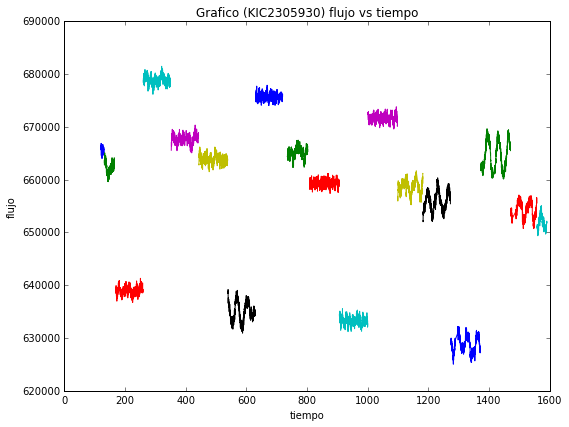

_____________________________________________________________________________________________________________


SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-10-22'         / file creation date.                            
CREATOR = '1072992 FluxExporter2PipelineModule' / pipeline job and program used 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.33 r60543' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [4]:
import kplr
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scl
#import pylab as plt
%pylab inline
#Inicializo la interface de kepler:
Kepler = kplr.API()


#Sacamos del catálogo KIC las curvas de luz de las estrellas, que se guardan en listas.
obj_KIC2305930=Kepler.star(2305930)
curvas_de_luz_1 = obj_KIC2305930.get_light_curves(short_cadence=True,fetch=False,clobber=False)

obj_KIC4348593=Kepler.star(4348593)
curvas_de_luz_2 = obj_KIC4348593.get_light_curves(short_cadence=True,fetch=False,clobber=False)

obj_KIC9469165=Kepler.star(9469165)
curvas_de_luz_3 = obj_KIC9469165.get_light_curves(short_cadence=True,fetch=False,clobber=False)

################# KIC 2305930 ####################
Flujo=[]
Tiempo=[]
Err_Flujo=[]

for elemento in curvas_de_luz_1:    
    archivo=elemento.open()  #Hay 3 extensiones y la segunda contiene las curvas de luz.
    LC=archivo[1].data #Datos
    Header=archivo[1].header 
    
    #Procederé a obtener los tiempos, flujos, errores, BJDI, etc.
    
    t = LC["time"]
    f = LC["pdcsap_flux"]
    ferr = LC["pdcsap_flux_err"]
    q = LC["sap_quality"]
    
    #Procederé a eliminar los nans
    #Para esto, hay una función en la librería numpy de nombre np.isnan(flujos) que lo que hace es identificar si hay o no nans
    #Retornará False si es que no hay nan.
    
    nan = np.isnan(f)
    Tiempo.append(t[~nan])
    Flujo.append(f[~nan])
    Err_Flujo.append(ferr[~nan])


    #Ploteando:
plt.subplots(figsize=(8,6))     
for i in range(len(Tiempo)):
    plt.title("Grafico (KIC2305930) flujo vs tiempo")
    plt.xlabel("tiempo")
    plt.ylabel("flujo")
    plt.plot(Tiempo[i],Flujo[i])
    
#plt.figure(figsize=(15, 15), dpi=100)
plt.tight_layout()
plt.show()

print("_____________________________________________________________________________________________________________")
## header del KIC2305930, para ver los parametros estelares.
archivo[0].header



Repitiendo el proceso, para las estrellas restantes tengo:

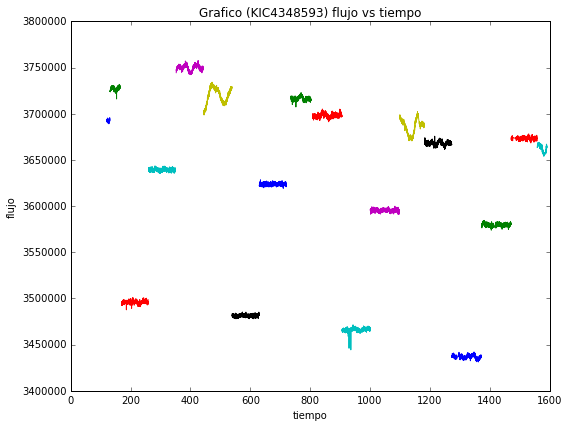

----------------------------------------------------------------------------------------------------------------


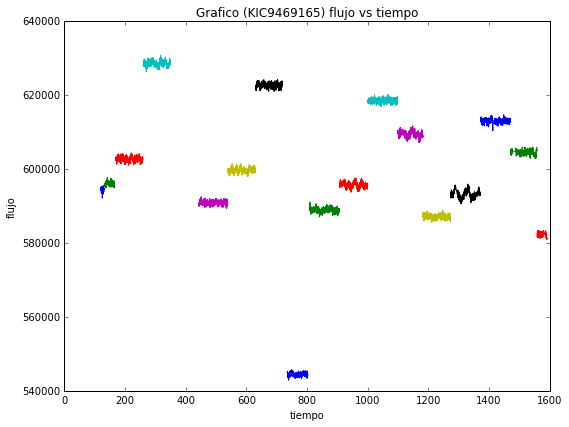

-----------------------------------------------------------------------------------------------------------------


SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-10-22'         / file creation date.                            
CREATOR = '1072439 FluxExporter2PipelineModule' / pipeline job and program used 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.33 r60543' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [5]:
############### KIC 4348593 ###################
Flujo2=[]
Tiempo2=[]
Err_Flujo2=[]

for elemento in curvas_de_luz_2:    
    archivo2=elemento.open()  
    LC=archivo2[1].data 
    Header=archivo2[1].header 
      
    t = LC["time"]
    f = LC["pdcsap_flux"]
    ferr = LC["pdcsap_flux_err"]
    q = LC["sap_quality"]

    nan = np.isnan(f)
    Tiempo2.append(t[~nan])
    Flujo2.append(f[~nan])
    Err_Flujo2.append(ferr[~nan])

plt.subplots(figsize=(8,6))     
for i in range(len(Tiempo2)):
    plt.title("Grafico (KIC4348593) flujo vs tiempo")
    plt.xlabel("tiempo")
    plt.ylabel("flujo")
    plt.plot(Tiempo2[i],Flujo2[i])

plt.tight_layout()    
plt.show()
print("----------------------------------------------------------------------------------------------------------------")

###################### KIC 9469165 ##############################

Flujo3=[]
Tiempo3=[]
Err_Flujo3=[]

for elemento in curvas_de_luz_3:    
    archivo3=elemento.open()  
    LC=archivo3[1].data 
    Header=archivo3[1].header 
    
    t = LC["time"]
    f = LC["pdcsap_flux"]
    ferr = LC["pdcsap_flux_err"]
    q = LC["sap_quality"]
    
    nan = np.isnan(f)
    Tiempo3.append(t[~nan])
    Flujo3.append(f[~nan])
    Err_Flujo3.append(ferr[~nan])
    
plt.subplots(figsize=(8,6))     
for i in range(len(Tiempo3)):
    plt.title("Grafico (KIC9469165) flujo vs tiempo")
    plt.xlabel("tiempo")
    plt.ylabel("flujo")
    plt.plot(Tiempo3[i],Flujo3[i])

plt.tight_layout()    
plt.show()
print("-----------------------------------------------------------------------------------------------------------------")

archivo2[0].header




In [6]:
#Header KIC 9469165

archivo3[0].header


SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-10-22'         / file creation date.                            
CREATOR = '1071457 FluxExporter2PipelineModule' / pipeline job and program used 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.33 r60543' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

### 3.-

Encontré la Siguiente RR Lyrae _"KIC7021124"_. Ahora procederé a obtener las curvas de luz.

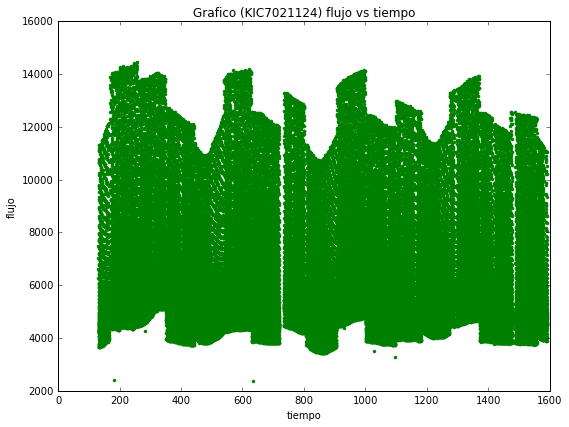

In [7]:
obj_KIC7021124=Kepler.star(7021124)
curvas_de_luz_4 = obj_KIC7021124.get_light_curves(short_cadence=False)
# Siguiendo los paso anteriores.
Flujo4=[]
Tiempo4=[]
Err_Flujo4=[]


for elemento in curvas_de_luz_4:    
    archivo=elemento.open()  
    LC=archivo[1].data 
    Header=archivo[1].header 
    
    t = LC["time"]
    f = LC["pdcsap_flux"]
    ferr = LC["pdcsap_flux_err"]
    q = LC["sap_quality"]
    
    nan = np.isnan(f)
    Tiempo4.append(t[~nan])
    Flujo4.append(f[~nan])
    Err_Flujo4.append(ferr[~nan])

plt.subplots(figsize=(8,6))   
for i in range(len(Tiempo4)):
    plt.title("Grafico (KIC7021124) flujo vs tiempo")
    plt.xlabel("tiempo")
    plt.ylabel("flujo")
    plt.plot(Tiempo4[i],Flujo4[i],'g.')
    

plt.tight_layout()    
plt.show()


El periodo de esta RR Lyrae es: 0.6224925 días 

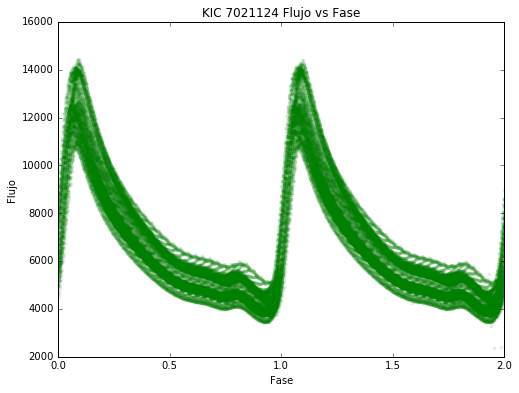

In [8]:
plt.subplots(figsize=(8,6))
plt.title('KIC 7021124 Flujo vs Fase')
plt.xlabel('Fase')
plt.ylabel('Flujo')
    
for j in range (0,len(Tiempo4)):
    plt.plot(Tiempo4[j]/0.6224925%2,Flujo4[j],'g.',alpha=.1)

plt.show()

### 4.-

Cuando hablamos de parámetros estelares, nos referimos a la metalicidad, temperatura efectiva, radio, masa, gravedad.
En la siguiente tabla estarán los parámetros estelares obtenidas por el analisis de la asterosismología (http://iopscience.iop.org/0067-0049/215/2/19/suppdata/apjs503771t5_mrt.txt).


|   Objeto (KIC)   |         TEFF (K)         |         Log(g) [cm/s²]         |     Metalicidad [Fe/H]     |
| ---------------- |:------------------------:|:----------------------:| ----------------------:|
|    2305930     |      4736      |  2.367  | -0.690 |
|    4348593     |      4958     |  2.701  | 0.040 |
|    9469165     |      4802      |  2.374  | -0780  |


A continuación, los parametros estelares dados por kplr (Vistos en el header de cada estrella):

|   Objeto (KIC)   |       TEFF (K)       |       Log(g) [cm/s²]      |     Metalicidad [Fe/H]     |  Radio $R_{0}$ |
| ---------------- |:------------------------:|:----------------------:|:----------------------:| -------------------:|
|    2305930     |      4891     |  2.367 | -0.690 | 10.150 |
|    4348593     |      5065      |  2.701  | 0.040 | 12.930 |
|    9469165     |      4997      |  2.374   | -0780  | 9.820 |


*asterosismología*: Es la ciencia que estudia la estructura interna de las estrellas pulsantes, gracias a la interpretación de sus espectros. Con esto se pueden obtener los parámetros estelares mencionados en las tablas anteriores. 

In [19]:
import pymultinest
from isochrones import StarModel
from isochrones.dartmouth import Dartmouth_Isochrone




    


ImportError: No module named pymultinest

### 5.-

Es posible apreciar las discontinuidades en cada _"Quarters"_ que son periodos de 90 días aproximadamente. A continuación procederé a quitar esto restando al flujo la diferencia de la mediana de cada cuarto con el promedio de las medianas.

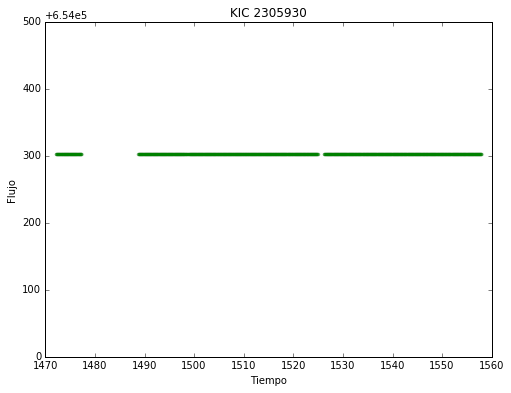

________________________________________________________________________________________________________________


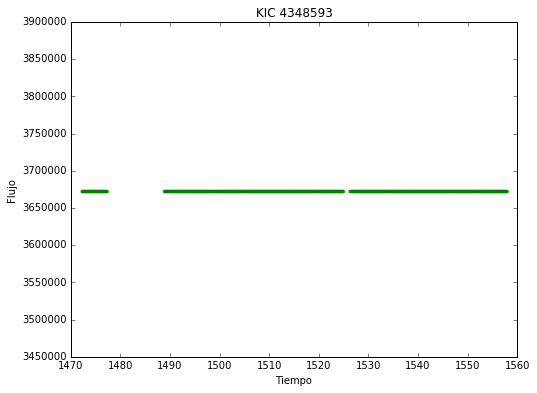

________________________________________________________________________________________________________________


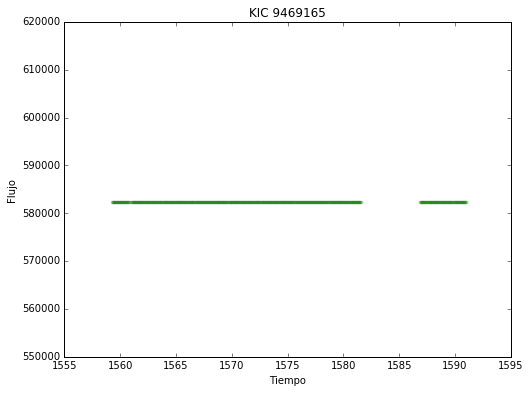

________________________________________________________________________________________________________________


In [16]:
#Para el KIC2305930.

plt.subplots(figsize=(8,6))
plt.title('KIC 2305930')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.ylim(654000,654500)
time = Tiempo[i]
flux = Flujo[i]
meds = []
for k in range(0,len(flux)):
    meds.append(np.median(flux[k]))
        
medsprom = np.mean(meds)
    
for j in range(0,len(time)):
    flux[j] = flux[j] - (meds[j] - medsprom)
    plt.plot(time[j],flux[j],'g.',alpha=.1)        

plt.show()

print("________________________________________________________________________________________________________________")

#Para el KIC4348593.

plt.subplots(figsize=(8,6))
plt.title('KIC 4348593')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
#plt.ylim(654000,654500)
time2 = Tiempo2[i]
flux2 = Flujo2[i]
meds2 = []
for k in range(0,len(flux2)):
    meds2.append(np.median(flux2[k]))
        
medsprom2 = np.mean(meds2)
    
for j in range(0,len(time2)):
    flux2[j] = flux2[j] - (meds2[j] - medsprom2)
    plt.plot(time2[j],flux2[j],'g.',alpha=.1)        

plt.show()

print("________________________________________________________________________________________________________________")

#Para el KIC9469165.

plt.subplots(figsize=(8,6))
plt.title('KIC 9469165')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
#plt.ylim(654000,654500)
time3 = Tiempo3[i]
flux3 = Flujo3[i]
meds3 = []
for k in range(0,len(flux3)):
    meds3.append(np.median(flux3[k]))
        
medsprom3 = np.mean(meds3)
    
for j in range(0,len(time3)):
    flux3[j] = flux3[j] - (meds3[j] - medsprom3)
    plt.plot(time3[j],flux3[j],'g.',alpha=.1)        

plt.show()

print("________________________________________________________________________________________________________________")


Fuentes:

> http://dan.iel.fm/kplr/

> http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html (para identificar los nan)

> http://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array

> http://archive.stsci.edu/kepler/manuals/archive_manual.pdf

> http://iopscience.iop.org/article/10.1088/0067-0049/215/2/19/pdf

### 7

La variabilidad en una estrella cefeidas y RR lyrae proviene del hecho que la estrella sufre de contracciones y expansiones, aumentando y disminuyendo su temperatura lo que le hace pulsar y cambiar su luminosidad en cosa de horas o dias, son muy regulares debido a lo regular de la variación.